In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, TargetEncoder, OrdinalEncoder, OneHotEncoder

In [154]:
# Importing the dataset:
column_names = ['Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country',
       'Income']

df = pd.read_csv('adult.csv', skipinitialspace=True)
df_test = pd.read_csv('adult.test.csv', header=None, names=column_names, skipinitialspace=True)

In [156]:
print(df.head(10))

   Age         Workclass  Final Weight  Education  EducationNum  \
0   39         State-gov         77516  Bachelors            13   
1   50  Self-emp-not-inc         83311  Bachelors            13   
2   38           Private        215646    HS-grad             9   
3   53           Private        234721       11th             7   
4   28           Private        338409  Bachelors            13   
5   37           Private        284582    Masters            14   
6   49           Private        160187        9th             5   
7   52  Self-emp-not-inc        209642    HS-grad             9   
8   31           Private         45781    Masters            14   
9   42           Private        159449  Bachelors            13   

          Marital Status         Occupation   Relationship   Race  Gender  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handl

In [158]:
print(df_test.head(10))

   Age         Workclass  Final Weight     Education  EducationNum  \
0   25           Private        226802          11th             7   
1   38           Private         89814       HS-grad             9   
2   28         Local-gov        336951    Assoc-acdm            12   
3   44           Private        160323  Some-college            10   
4   18                 ?        103497  Some-college            10   
5   34           Private        198693          10th             6   
6   29                 ?        227026       HS-grad             9   
7   63  Self-emp-not-inc        104626   Prof-school            15   
8   24           Private        369667  Some-college            10   
9   55           Private        104996       7th-8th             4   

       Marital Status         Occupation   Relationship   Race  Gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Marr

In [160]:
# Deleting dots from the Income column of test dataset
df_test["Income"] = df_test["Income"].str.rstrip('.').astype('category')

# We do't need final weight feature for model training, so it will be dropped
df = df.drop("Final Weight", axis=1)
df_test = df_test.drop('Final Weight', axis=1)

print(df.shape)
print(df_test.shape)

# Let's drop duplicates from the dataframe
df = df.drop_duplicates()
df_test.drop_duplicates()

# Defining numerical and categorical features
numerical_cols = ["Age", "Capital Gain", "capital loss", "Hours per Week", "EducationNum"]
categorical_cols = ["Education", "Workclass", "Relationship", "Occupation", "Marital Status", "Gender", "Race", "Native Country"]

# Let's look at the structure of categorical features:
for column in categorical_cols:
    print(df[column].value_counts(dropna=False).to_frame())

# Featues "Workclass", "Occupation" and "Native Country" have missing values, so we are dropping them:

def drop_missing_vals(dframe, column):
    dframe_cleaned = dframe.drop(dframe[dframe[column] == '?'].index)
    return dframe_cleaned
    
for column in ["Workclass", "Occupation", "Native Country"]:
    df = drop_missing_vals(df, column)
    df_test = drop_missing_vals(df_test, column)

print(df.shape)
print(df_test.shape)

(32561, 14)
(16281, 14)
              count
Education          
HS-grad        8886
Some-college   6378
Bachelors      4810
Masters        1653
Assoc-voc      1331
11th           1056
Assoc-acdm     1053
10th            867
7th-8th         629
Prof-school     566
9th             507
12th            414
Doctorate       402
5th-6th         328
1st-4th         166
Preschool        50
                  count
Workclass              
Private           19621
Self-emp-not-inc   2473
Local-gov          2040
?                  1632
State-gov          1272
Self-emp-inc       1091
Federal-gov         946
Without-pay          14
Never-worked          7
                count
Relationship         
Husband         11506
Not-in-family    7684
Own-child        4096
Unmarried        3317
Wife             1528
Other-relative    965
                   count
Occupation              
Prof-specialty      3885
Exec-managerial     3719
Adm-clerical        3340
Craft-repair        3298
Sales               3270
O

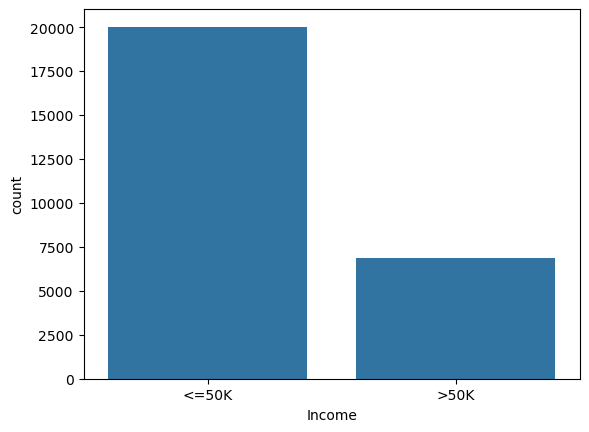

In [162]:
# Plotting the target variable:
sns.countplot(data=df, x="Income")
plt.show()

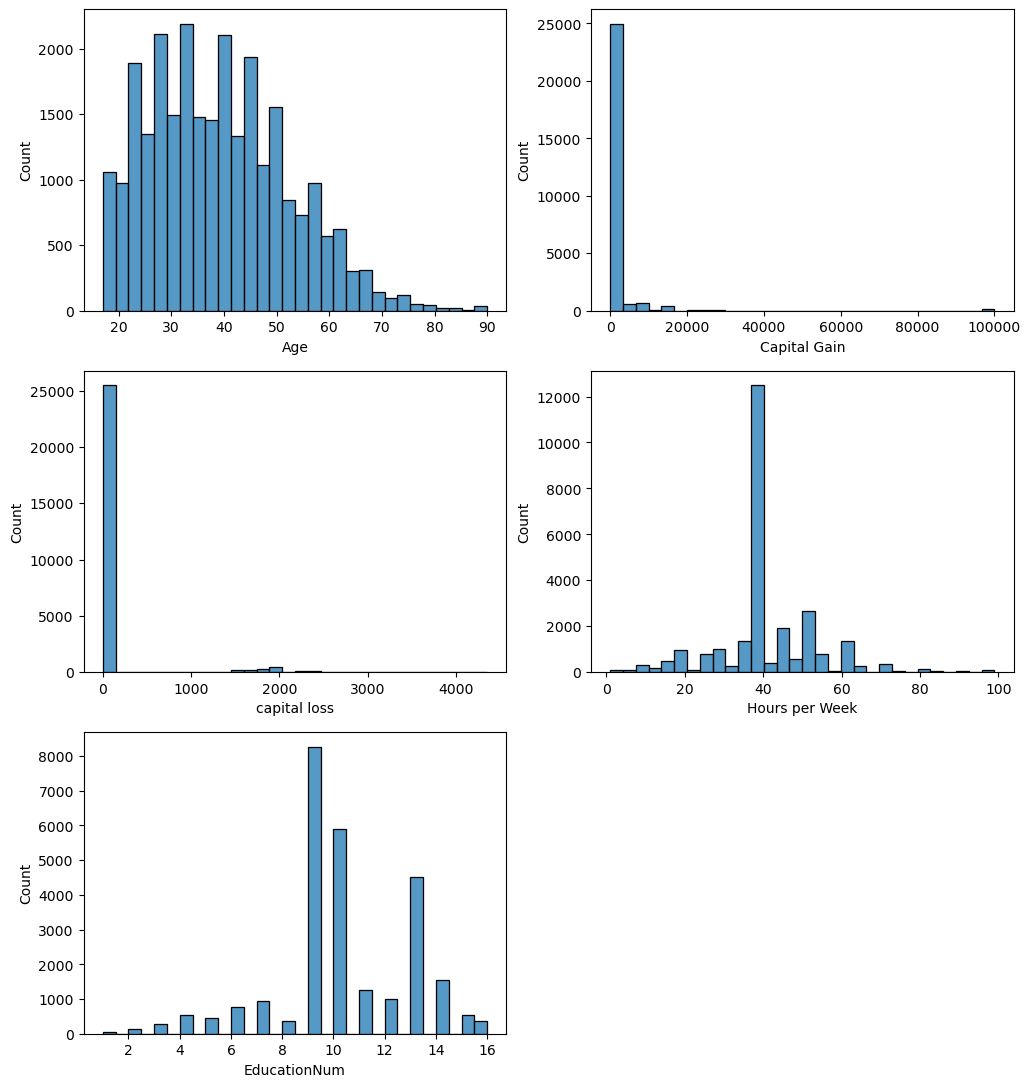

In [164]:
# Plotting numerical features
plt.figure(figsize=(12, 18))
for i, column in enumerate(numerical_cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=df, x=column, bins=30)
plt.show()

In [166]:
# There is a suspicious outlier equal to almost 100000 in Capital Gain column, let's check it:

print(sorted(df["Capital Gain"].unique(), reverse=True))

[99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051, 18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605, 10566, 10520, 9562, 9386, 8614, 7978, 7896, 7688, 7443, 7430, 7298, 6849, 6767, 6723, 6514, 6497, 6418, 6360, 6097, 5721, 5556, 5455, 5178, 5060, 5013, 4934, 4931, 4865, 4787, 4687, 4650, 4508, 4416, 4386, 4101, 4064, 3942, 3908, 3887, 3818, 3781, 3674, 3471, 3464, 3456, 3432, 3418, 3411, 3325, 3273, 3137, 3103, 2993, 2977, 2964, 2961, 2936, 2907, 2885, 2829, 2653, 2635, 2597, 2580, 2538, 2463, 2414, 2407, 2387, 2354, 2346, 2329, 2290, 2228, 2202, 2176, 2174, 2105, 2062, 2050, 2036, 2009, 1848, 1831, 1797, 1639, 1506, 1471, 1455, 1424, 1409, 1173, 1151, 1086, 1055, 991, 914, 594, 401, 114, 0]


In [168]:
# It can be seen from the output that there are no values close to 99999. 99999 is often used to indicate NaN value, so ve will drop these rows:
df = df.drop(df[df["Capital Gain"] == 99999].index)
df_test = df_test.drop(df_test[df_test["Capital Gain"] == 99999].index)

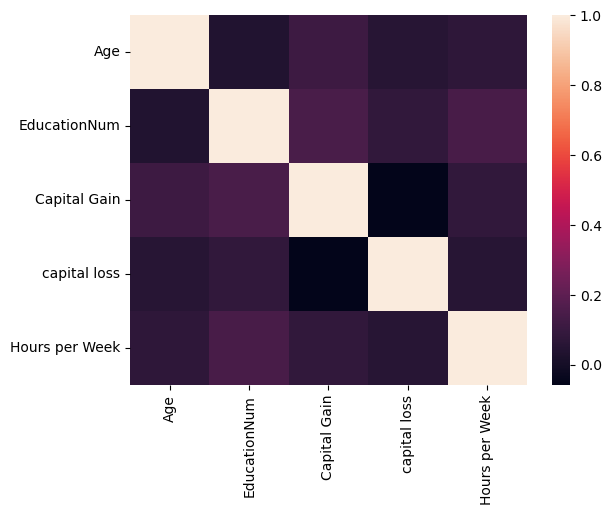

In [174]:
# Let's check the correlation between numerical variables:
corr = df[''].corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
);

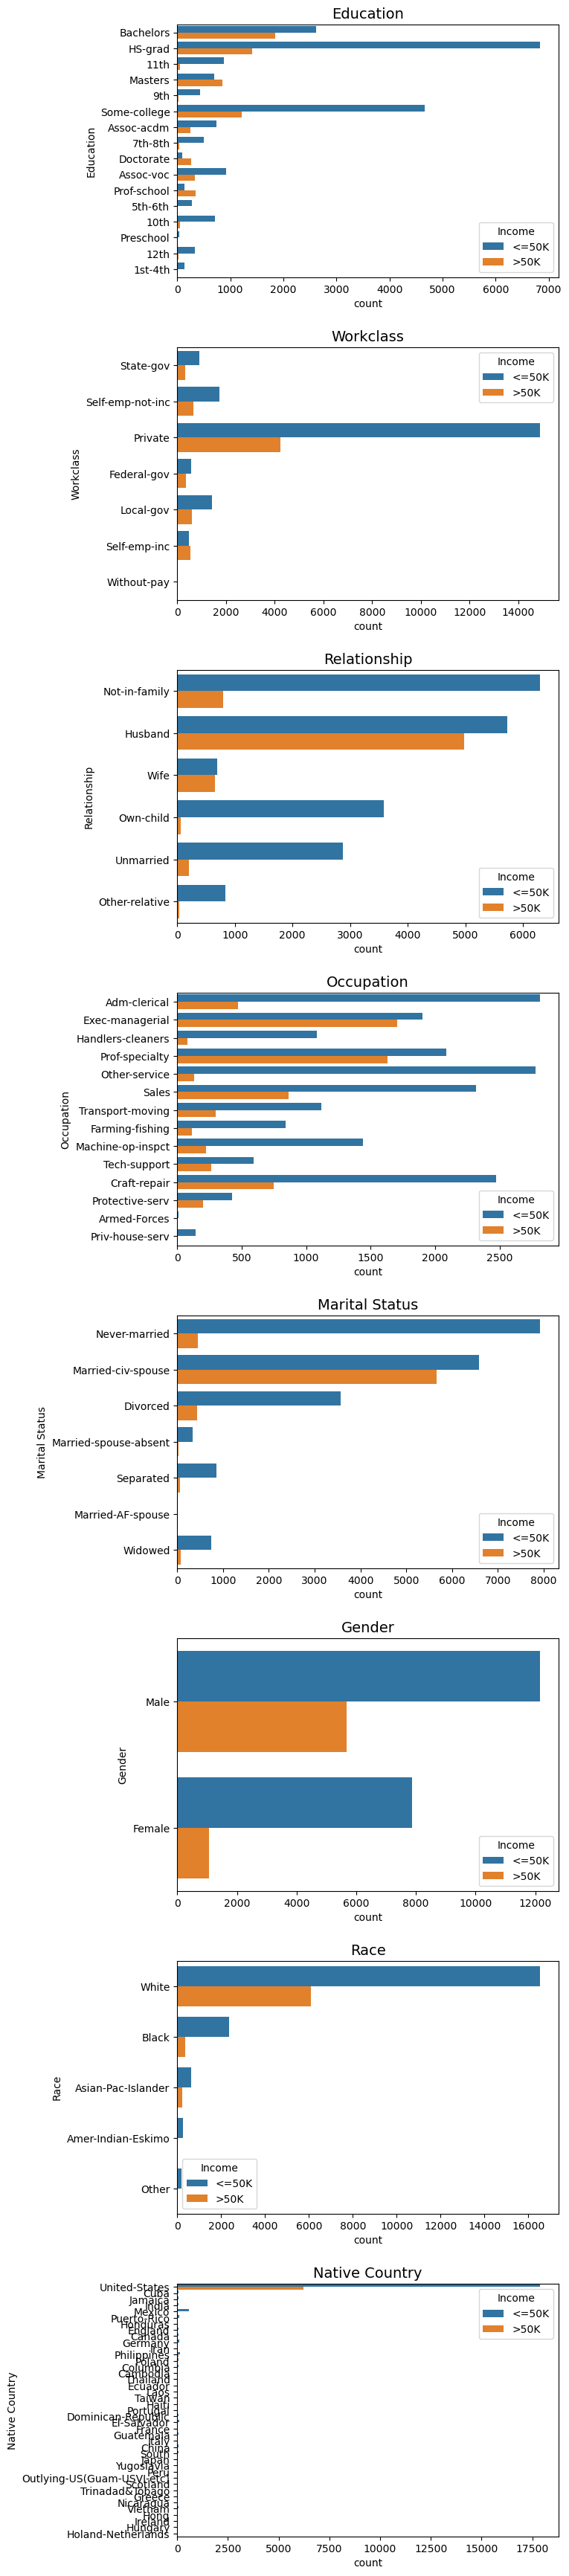

In [103]:
# Now let's make plot's for categorical data:
plt.figure(figsize=(8, 35))

for i, column in enumerate(categorical_cols):
    plt.subplot(8, 1, i+1)
    plt.title(column, fontsize=14)
    sns.countplot(data=df, hue="Income", y=column)
    plt.tight_layout(pad=2.0)
plt.show()

In [111]:
# Apply log transformation to capital gain and capiral loss, because those features are highly skewed:

df['Capital Gain'] = np.log1p(df['Capital Gain'])
df['Capital Gain'] = np.log1p(df['capital loss'])

df_test['Capital Gain'] = np.log1p(df_test['Capital Gain'])
df_test['capital loss'] = np.log1p(df_test['capital loss'])

In [113]:
# Standartizing numerical features:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols]) 

print(df[numerical_cols].head(10))

        Age  Capital Gain  capital loss  Hours per Week  EducationNum
0 -0.000737     -0.235357     -0.232082       -0.090416      1.099143
1  0.833212     -0.235357     -0.232082       -2.280682      1.099143
2 -0.076550     -0.235357     -0.232082       -0.090416     -0.432097
3  1.060652     -0.235357     -0.232082       -0.090416     -1.197717
4 -0.834685     -0.235357     -0.232082       -0.090416      1.099143
5 -0.152364     -0.235357     -0.232082       -0.090416      1.481953
6  0.757398     -0.235357     -0.232082       -2.037319     -1.963337
7  0.984838     -0.235357     -0.232082        0.315188     -0.432097
8 -0.607244     -0.235357     -0.232082        0.720793      1.481953
9  0.226704     -0.235357     -0.232082       -0.090416      1.099143


In [115]:
education_sorted = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
 '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc',
 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']

In [117]:
# Encoding categorical data:

ohe_categorical_cols = ["Gender", "Race"]
target_categorical_cols = ["Workclass", "Relationship", "Occupation", "Marital Status", "Native Country"]
ordinal_categorical_cols = ["Education"]

ohe_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform='pandas')
ohe_encoded_cols = ohe_encoder.fit_transform(df[ohe_categorical_cols])
ohe_encoded_cols_test = ohe_encoder.transform(df_test[ohe_categorical_cols])

target_encoder = TargetEncoder()
target_encoded_cols = pd.DataFrame(target_encoder.fit_transform(df[target_categorical_cols], df["Income"]), columns=target_categorical_cols)
target_encoded_cols_test = pd.DataFrame(target_encoder.transform(df_test[target_categorical_cols]), columns=target_categorical_cols)

ordinal_encoder = OrdinalEncoder(categories=[education_sorted])
ordinal_encoded_cols = pd.DataFrame(ordinal_encoder.fit_transform(df[ordinal_categorical_cols]), columns=ordinal_categorical_cols)
ordinal_encoded_cols_test = pd.DataFrame(ordinal_encoder.transform(df_test[ordinal_categorical_cols]), columns=ordinal_categorical_cols)

df_encoded = pd.concat(
    [df.drop(columns=categorical_cols), ohe_encoded_cols, target_encoded_cols, ordinal_encoded_cols],
    axis=1
)

df_encoded_test = pd.concat(
    [df_test.drop(columns=categorical_cols), ohe_encoded_cols_test, target_encoded_cols_test, ordinal_encoded_cols_test],
    axis=1
)

print(df_encoded.head(10))

        Age  EducationNum  Capital Gain  capital loss  Hours per Week Income  \
0 -0.000737      1.099143     -0.235357     -0.232082       -0.090416  <=50K   
1  0.833212      1.099143     -0.235357     -0.232082       -2.280682  <=50K   
2 -0.076550     -0.432097     -0.235357     -0.232082       -0.090416  <=50K   
3  1.060652     -1.197717     -0.235357     -0.232082       -0.090416  <=50K   
4 -0.834685      1.099143     -0.235357     -0.232082       -0.090416  <=50K   
5 -0.152364      1.481953     -0.235357     -0.232082       -0.090416  <=50K   
6  0.757398     -1.963337     -0.235357     -0.232082       -2.037319  <=50K   
7  0.984838     -0.432097     -0.235357     -0.232082        0.315188   >50K   
8 -0.607244      1.481953     -0.235357     -0.232082        0.720793   >50K   
9  0.226704      1.099143     -0.235357     -0.232082       -0.090416   >50K   

   Gender_Female  Gender_Male  Race_Amer-Indian-Eskimo  \
0            0.0          1.0                      0.0   
1  